In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
Data = pd.read_csv('/kaggle/input/genre-music/music_genre_cleaned.csv')
#Data = pd.read_csv("/kaggle/input/new-data/new_data.csv")



In [6]:
Data.shape

(50000, 124)

In [ ]:
Data.head().T


,0,1,2,3,4
Unnamed: 0,0.00000,1.0000,2.00000,3.0000,4.00000
popularity,27.00000,31.0000,28.00000,34.0000,32.00000
acousticness,0.00468,0.0127,0.00306,0.0254,0.00465
danceability,0.65200,0.6220,0.62000,0.7740,0.63800
duration_ms,-1.00000,218293.0000,215613.00000,166875.0000,222369.00000
...,...,...,...,...,...
column_name_104,0.00000,0.0000,0.00000,0.0000,0.00000
column_name_105,0.00000,0.0000,0.00000,0.0000,0.00000
column_name_106,0.00000,0.0000,0.00000,0.0000,0.00000
column_name_107,0.00000,0.0000,0.00000,0.0000,0.00000


In [5]:
genre_counts = Data.groupby('music_genre')['mode'].count()
genre_counts

music_genre
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: mode, dtype: int64

In [ ]:
# Print the shape of the dataset (number of rows, number of columns)
print(Data.shape)
# Print some basic statistics about the dataset
print(Data.describe())


(50000, 124)
         Unnamed: 0    popularity  acousticness  danceability   duration_ms  \
count  50000.000000  50000.000000  50000.000000  50000.000000  5.000000e+04   
mean   25003.500000     44.220420      0.306383      0.558241  2.212526e+05   
std    14435.286793     15.542008      0.341340      0.178632  1.286720e+05   
min        0.000000      0.000000      0.000000      0.059600 -1.000000e+00   
25%    12504.750000     34.000000      0.020000      0.442000  1.748000e+05   
50%    25004.500000     45.000000      0.144000      0.568000  2.192810e+05   
75%    37504.250000     56.000000      0.552000      0.687000  2.686122e+05   
max    50004.000000     99.000000      0.996000      0.986000  4.830606e+06   

             energy  instrumentalness           key      liveness  \
count  50000.000000      50000.000000  50000.000000  50000.000000   
mean       0.599755          0.181601      5.354420      0.193896   
std        0.264559          0.325409      3.457225      0.161637   

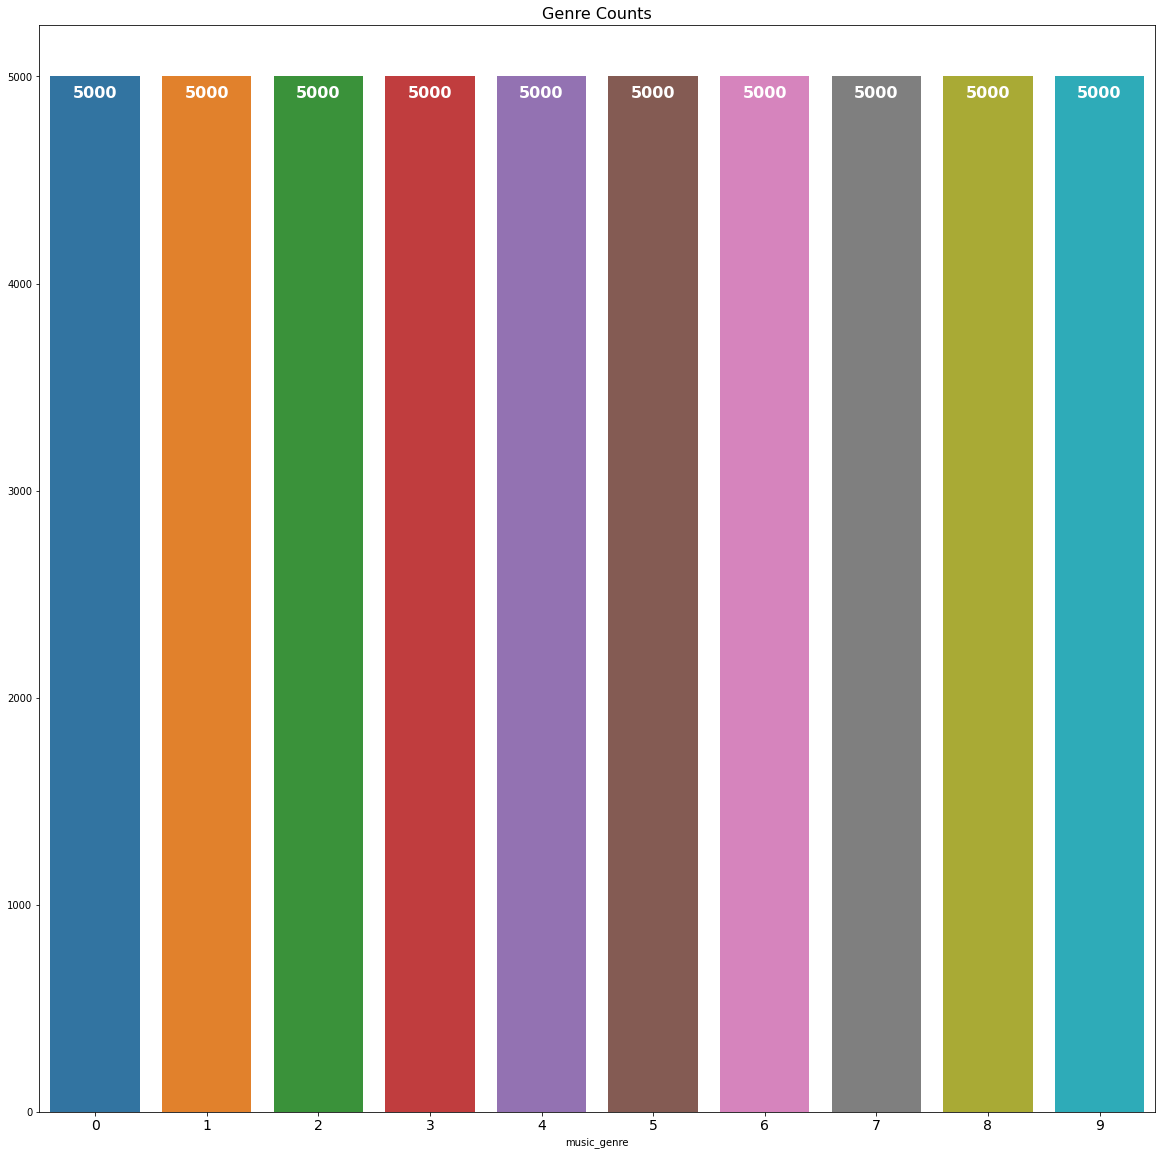

In [6]:
plt.figure(figsize=(20,20))
plt.title('Genre Counts', size=16)
plt.xticks(size=14)

g = sns.barplot(x=genre_counts.index, y=genre_counts.values);

for index, row in enumerate(genre_counts):
     g.text(index, row-100, row, color='white', ha="center", size='16', weight='bold')

plt.show()


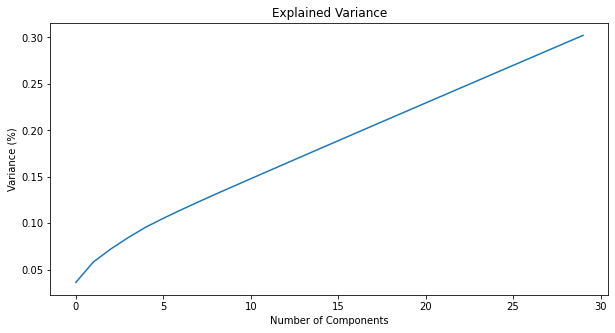

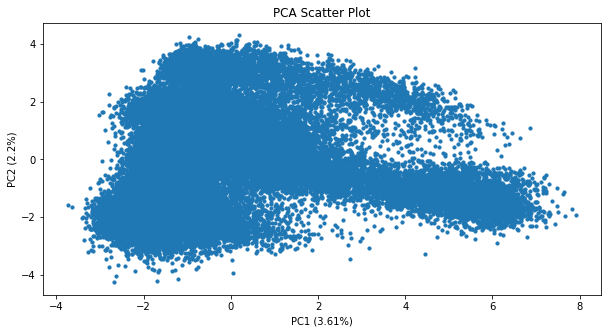

In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Data_numeric = Data.select_dtypes(exclude=['object'])
ss = StandardScaler()
df_scaled = ss.fit_transform(Data_numeric.values)

pca = PCA(n_components=30)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')

plt.figure(figsize=(10,5))
plt.scatter(df_pca[:,0], df_pca[:,1], s=10)
plt.xlabel('PC1 ('+str(round(pca.explained_variance_ratio_[0]*100, 2))+'%)')
plt.ylabel('PC2 ('+str(round(pca.explained_variance_ratio_[1]*100, 2))+'%)')
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
#pca = PCA(n_components=30)
#df_pca = pca.fit_transform(df_scaled)

loadings = pd.DataFrame(pca.components_, columns=Data_numeric.columns)
loadings = loadings.transpose()

print(loadings)

                        0         1         2
Unnamed: 0       0.043925 -0.467273 -0.379904
popularity      -0.260396 -0.349966 -0.006237
acousticness     0.375938 -0.147411  0.029680
danceability    -0.290575 -0.125129  0.216627
duration_ms      0.090758  0.023794  0.045820
...                   ...       ...       ...
column_name_104 -0.006847 -0.012562 -0.008114
column_name_105 -0.004020 -0.003852  0.004864
column_name_106 -0.000918  0.004292 -0.009089
column_name_107 -0.013017  0.014473 -0.032032
column_name_108 -0.012148 -0.016737  0.005687

[124 rows x 3 columns]


In [ ]:
print(loadings[abs(loadings.iloc[:, 0])>0.2
              ])

                         0         1         2
popularity       -0.260396 -0.349966 -0.006237
acousticness      0.375938 -0.147411  0.029680
danceability     -0.290575 -0.125129  0.216627
energy           -0.377024  0.214817 -0.065790
instrumentalness  0.301917  0.066148  0.271155
loudness         -0.408435  0.161129 -0.041616
valence          -0.230410  0.037707 -0.067427
column_name_7     0.347515 -0.142002 -0.123083


In [ ]:
print(loadings[abs(loadings.iloc[:, 0])>0.4])

                 0         1         2
loudness -0.408435  0.161129 -0.041616


In [ ]:
import pandas as pd

# create a new dataframe with only the specified columns
df = Data[["popularity", "acousticness", "danceability", "energy", "instrumentalness", "loudness", "speechiness", "tempo", "valence", "music_genre", "column_name_7", "column_name_19" , "column_name_80" , "column_name_98",
          "column_name_0","column_name_1","column_name_8","column_name_9","column_name_11","column_name_94"]]

# preview the new dataframe
print(df.head())


   popularity  acousticness  danceability  energy  instrumentalness  loudness  \
0        27.0       0.00468         0.652   0.941           0.79200    -5.201   
1        31.0       0.01270         0.622   0.890           0.95000    -7.043   
2        28.0       0.00306         0.620   0.755           0.01180    -4.617   
3        34.0       0.02540         0.774   0.700           0.00253    -4.498   
4        32.0       0.00465         0.638   0.587           0.90900    -6.266   

   speechiness    tempo  valence  music_genre  column_name_7  column_name_19  \
0       0.0748  100.889    0.759            5              0               0   
1       0.0300  115.002    0.531            5              0               0   
2       0.0345  127.994    0.333            5              0               0   
3       0.2390  128.014    0.270            5              0               0   
4       0.0413  145.036    0.323            5              0               0   

   column_name_80  column_name_9

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   energy            50000 non-null  float64
 4   instrumentalness  50000 non-null  float64
 5   loudness          50000 non-null  float64
 6   speechiness       50000 non-null  float64
 7   tempo             50000 non-null  float64
 8   valence           50000 non-null  float64
 9   music_genre       50000 non-null  int64  
 10  column_name_7     50000 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.2 MB


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

random_state = 112

#Separate labels from features
X = Data.drop('music_genre', axis=1)  # drop the 'music_genre' column to get the features

X = Data.drop('Unnamed: 0', axis=1)  

y = Data['music_genre'] # select the 'music_genre' column as the target variable

ss=StandardScaler()
df_scaled=ss.fit_transform(Data.select_dtypes(exclude=['object']).values)
#PCA to reduce the dimensionality of your data to 3 principal components,
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

# Split the data into training and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(df_pca, y, test_size=0.27, random_state=random_state)

# Split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, test_size=0.27, random_state=random_state)

# Print the sizes of the three sets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_valid))
print("Test set size:", len(X_test))

Training set size: 26645
Validation set size: 9855
Test set size: 13500


In [8]:
y_train.value_counts().sort_index()


0    2635
1    2674
2    2697
3    2645
4    2662
5    2666
6    2664
7    2685
8    2667
9    2650
Name: music_genre, dtype: int64

In [9]:
y_valid.value_counts().sort_index()


0    1011
1     974
2     982
3    1014
4    1024
5     958
6     944
7    1000
8     949
9     999
Name: music_genre, dtype: int64

# Modelling and Training¶
# **LogisticRegression**


In [6]:
from sklearn.linear_model import LogisticRegression
# Create Logistic Regression model
lr_model = LogisticRegression(random_state=random_state)

In [7]:
# Define hyperparameters for GridSearchCV
lr_parameters = {'penalty' : ['none', 'l2'],
        'C' : [0.01,0.05,0.1,0.2,0.3,0.5,0.8,1,5,10,30,50,80,100],
        }
# Create GridSearchCV object with 5-fold cross-validation
gscv = GridSearchCV(lr_model, lr_parameters, cv=5, n_jobs=-1 ,verbose=2,error_score='raise')
#Fit GSCV
gscv.fit(X_train,y_train.values.ravel())

#Get best estimator
best_model_lr = gscv.best_estimator_

# Print best hyperparameters and corresponding score
print('The best estimator is : ', best_model_lr)
print("Best score:", gscv.best_score_)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python

The best estimator is :  LogisticRegression(C=5, random_state=112)
Best score: 0.8398949146181272


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [8]:
best_model_lr.fit(X_train,y_train.values.ravel())

# Get predictions for testing set using best model
y_pred_lr = best_model_lr.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred=y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1354
           1       0.99      0.97      0.98      1352
           2       0.79      0.81      0.80      1321
           3       0.95      0.90      0.93      1341
           4       0.71      0.76      0.73      1314
           5       0.95      0.94      0.95      1376
           6       0.77      0.79      0.78      1392
           7       0.92      0.92      0.92      1315
           8       0.86      0.86      0.86      1384
           9       0.69      0.68      0.69      1351

    accuracy                           0.84     13500
   macro avg       0.84      0.84      0.84     13500
weighted avg       0.84      0.84      0.84     13500



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

  warnings.warn(

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters

  warnings.warn(

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:117

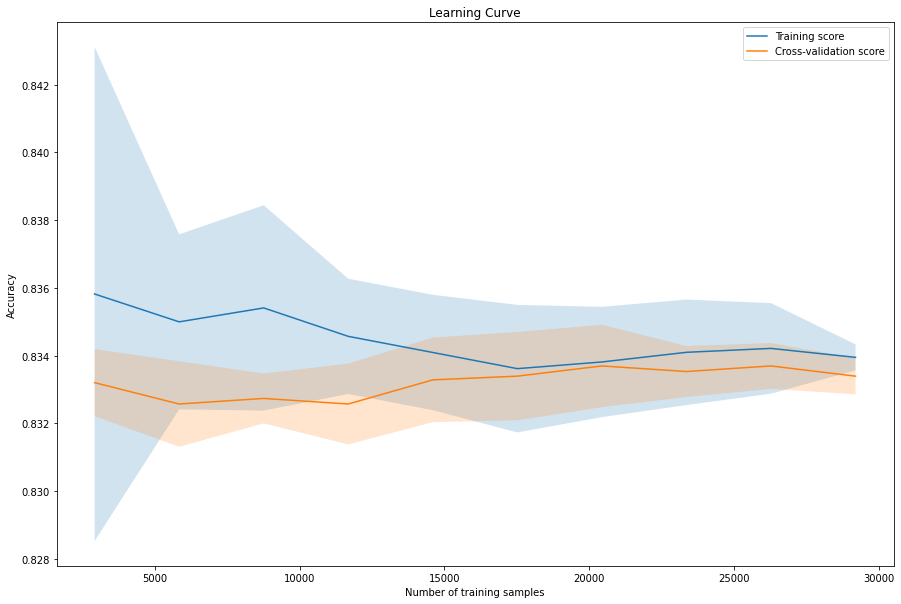

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Set up the logistic regression model and parameters
lr_model = LogisticRegression(C=0.3, penalty='none', random_state=112)

# Use the learning_curve function to generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(lr_model, X_train_val, y_train_val, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=random_state)

# Calculate the mean and standard deviation of the training and test scores at each training size
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15, 10))
# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

# Add labels and legend
plt.title('Learning Curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Show the plot
plt.show()

### The training score curve for a logistic regression decreases and reaches a value of 0.834, it means that the model is fitting well to the training data. This indicates that the logistic regression is able to accurately predict the outcome variable for the training data.

### The cross-validation curve increases and also achieves a value of 0.834, it means that the model is able to generalize well to unseen data. Cross-validation is a technique used to evaluate the performance of a model on data that was not used during training. If the cross-validation score is similar to the training score, it suggests that the model is not overfitting to the training data.

### So if both the training score and cross-validation score for a logistic regression are 0.834 like in our case, it means that the model is performing well both on the training data and on unseen data

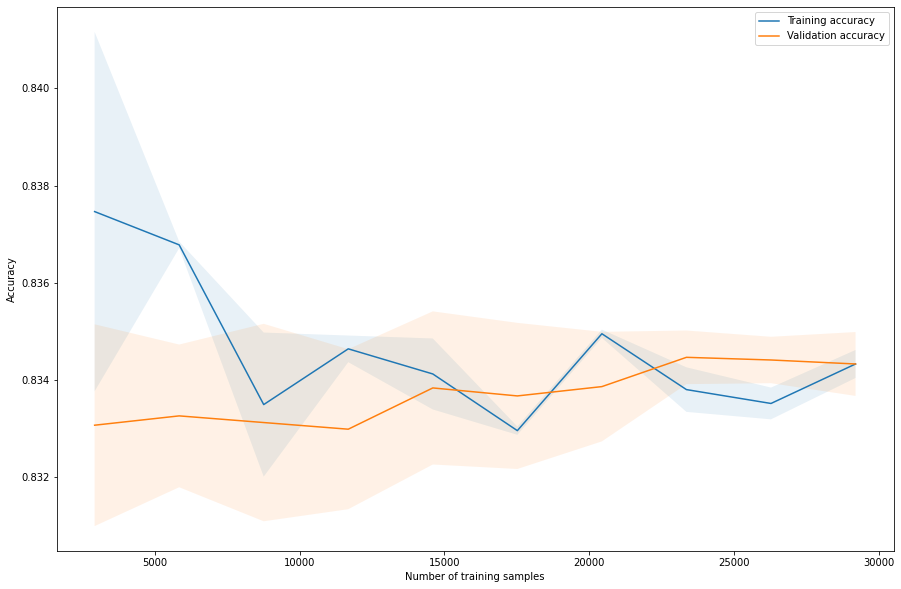

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model_lr, X=X_train_val, y=y_train_val, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15, 10))

plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, test_mean, label='Validation accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

### We notice that the curve of the validation accuracy increases and training accuracy decreases. There is also an intersection between these two curves in the 30000 training samples, it may cause overfitting but it stopped before.

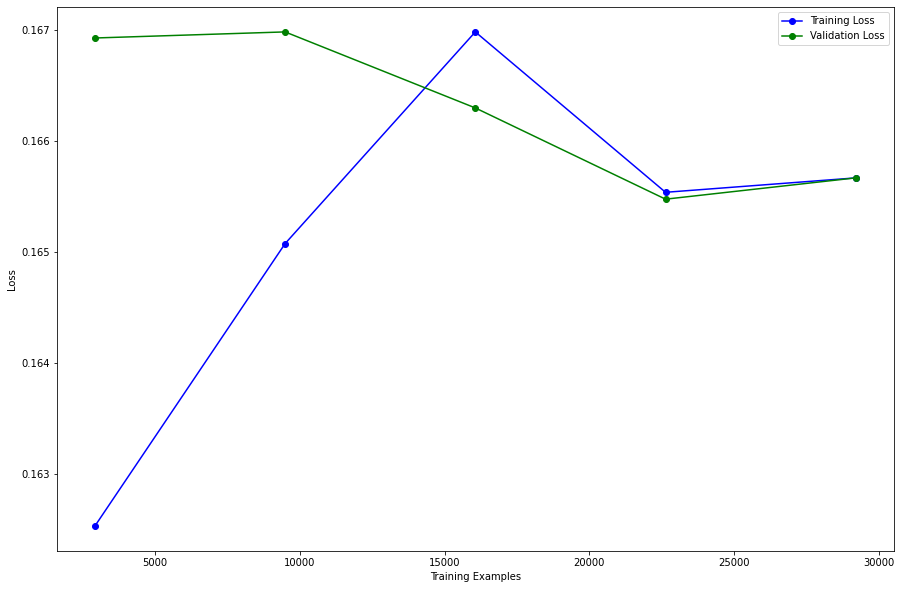

In [101]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model_lr, X_train_val, y_train_val, cv=5, n_jobs=-1)
train_loss = 1 - train_scores.mean(axis=1)
test_loss = 1 - test_scores.mean(axis=1)

plt.figure(figsize=(15, 10))
plt.plot(train_sizes, train_loss, 'o-', color="b", label="Training Loss")
plt.plot(train_sizes, test_loss, 'o-', color="g", label="Validation Loss")
plt.xlabel("Training Examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()


### It is not unusual for the training loss to initially increase during the early stages of training. This is because the model is trying to fit to the training data and may initially overfit, which can cause the training loss to increase. As training continues, the model may learn to generalize better to the data, resulting in a decrease in the training loss.

### However, if the training loss continues to increase and does not decrease at a later stage of training, it may indicate that the model is not learning well and may require adjustments to the model architecture or training parameters, but it's not our case because the training loss decrease and the same thing for the validation loss, so we conculure that there's no an overfitting.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
best_model_lr.fit(X_train,y_train)

# Get the feature importance scores for each label
importance = best_model_lr.coef_

# Print the top 10 feature importances for each label
for i, label in enumerate(best_model_lr.classes_):
    print(f"\nTop 10 feature importances for label {label}:")
    top_10_indices_values = sorted(enumerate(importance[i]), key=lambda x: abs(x[1]), reverse=True)[:10]
    for j, value in top_10_indices_values:
        feature_name = X.columns[j]
        feature_importance = abs(value) * 100
        print(f"{feature_name:<30} {feature_importance:.2f}")



Top 10 feature importances for label 0:
popularity                     0.31
tempo                          0.25
music_genre                    0.18
loudness                       0.10
column_name_4                  0.01
key                            0.01
acousticness                   0.01
energy                         0.01
instrumentalness               0.00
column_name_9                  0.00

Top 10 feature importances for label 1:
popularity                     0.78
tempo                          0.53
music_genre                    0.14
column_name_9                  0.04
loudness                       0.03
key                            0.02
instrumentalness               0.00
energy                         0.00
column_name_7                  0.00
column_name_1                  0.00

Top 10 feature importances for label 2:
popularity                     0.46
music_genre                    0.11
tempo                          0.11
loudness                       0.02
column_name_4

In [40]:
importance.shape

(10, 123)

In [ ]:
Data.columns

Index(['Unnamed: 0', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness',
       ...
       'column_name_99', 'column_name_100', 'column_name_101',
       'column_name_102', 'column_name_103', 'column_name_104',
       'column_name_105', 'column_name_106', 'column_name_107',
       'column_name_108'],
      dtype='object', length=124)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


<Axes: >

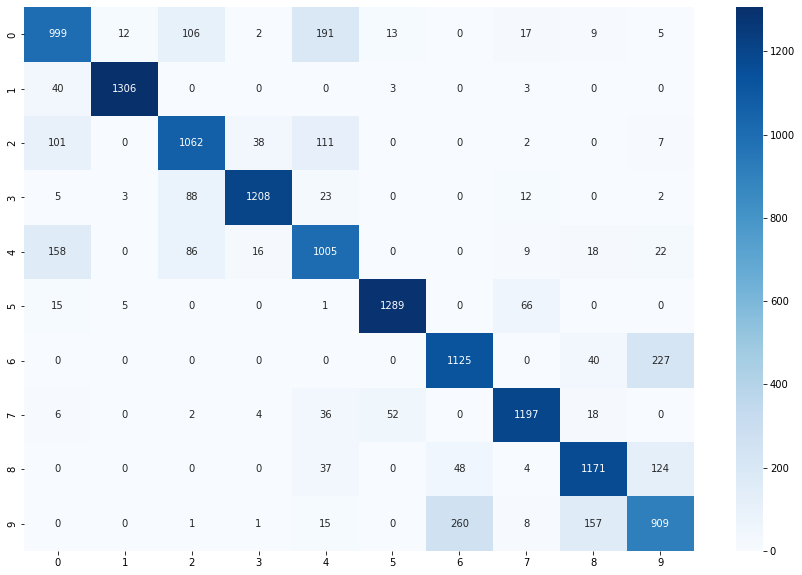

In [104]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred=y_pred_lr)

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')


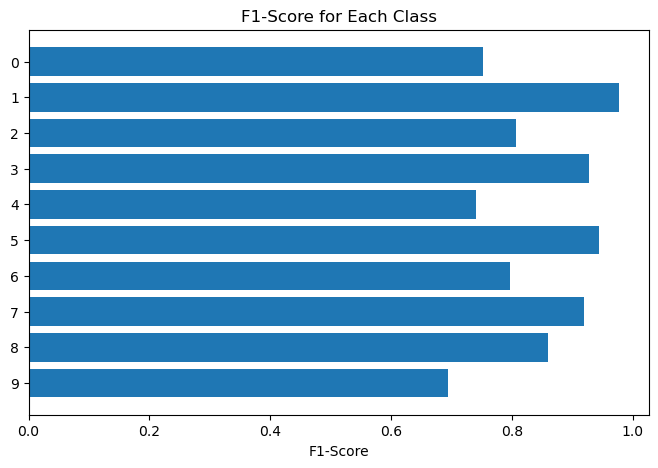

In [ ]:
# Print classification report
report = classification_report(y_test, y_pred_lr, output_dict=True)

# Extract f1-score for each class
class_names = list(report.keys())[0:-3]
f1_scores = [report[class_name]['f1-score'] for class_name in class_names]

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 5))
y_pos = np.arange(len(class_names))
ax.barh(y_pos, f1_scores, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(class_names)
ax.invert_yaxis()
ax.set_xlabel('F1-Score')
ax.set_title('F1-Score for Each Class')
plt.show()


# **Decision Tree Classifier**

In [108]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = random_state)

In [109]:
#Cross-Validated Grid Search
dtc_parameters = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [3,4,5,6],
              'min_samples_leaf' : [1,2,3,4,5,6],
              'min_samples_split' : [2,3,4,5],
              'max_features' : ['sqrt','log2',None]
             }
dtc_gscv = GridSearchCV(dtc, dtc_parameters, cv=5, n_jobs=-1 ,verbose=2,error_score='raise')
#Fit GSCV
dtc_gscv.fit(X_train,y_train.values.ravel())
#Get best estimator
dtc_best_model = dtc_gscv.best_estimator_
print('The best estimator is : ', dtc_best_model)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits

The best estimator is :  DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=112)


In [110]:
# Use the best model to make predictions on the testing set
dtc_best_model = dtc_gscv.best_estimator_
y_pred_dtc = dtc_best_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred=y_pred_dtc))

              precision    recall  f1-score   support



           0       0.71      0.69      0.70      1354

           1       0.99      0.94      0.96      1352

           2       0.81      0.65      0.72      1321

           3       0.99      0.83      0.91      1341

           4       0.55      0.79      0.64      1314

           5       0.91      0.93      0.92      1376

           6       0.66      0.81      0.73      1392

           7       0.91      0.91      0.91      1315

           8       0.84      0.78      0.81      1384

           9       0.66      0.55      0.60      1351



    accuracy                           0.79     13500

   macro avg       0.80      0.79      0.79     13500

weighted avg       0.80      0.79      0.79     13500




<Axes: >

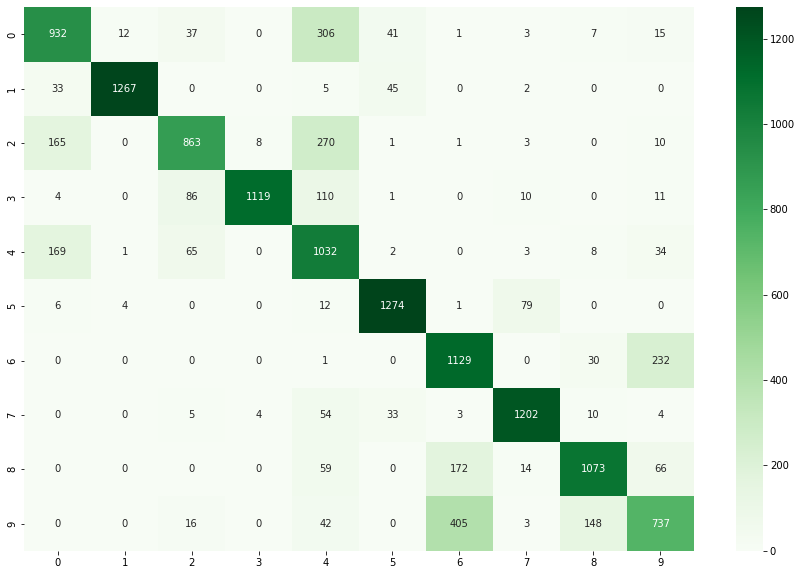

In [111]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred=y_pred_dtc)
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(cm, annot=True, fmt='g', cmap='Greens')


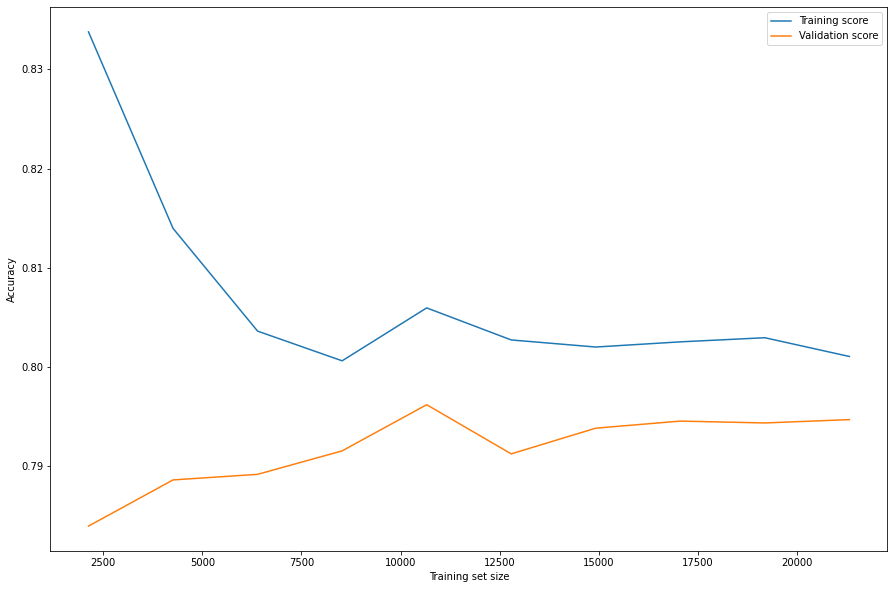

In [112]:
train_sizes, train_scores, val_scores = learning_curve(dtc_best_model, X_train, y_train.values.ravel(), cv=5, 
                                                        scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.figure(figsize=(15, 10))

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### If the validation score for a decision tree model is much lower than the training score, it could suggest that the model is overfitting the training data. Decision tree model is overfitting.When the training score for a decision tree model decreases from 0.85 to 0.805, it suggests that the model is becoming less complex and is potentially reducing its ability to fit the training data. This can happen if the decision tree is overfitting the training data by capturing too much of the noise in the data, which can lead to poor performance on unseen data.

### If the validation score for the same model increases slightly from 0.78 to 0.795, it suggests that the model is generalizing slightly better to unseen data, but not by a significant amount. This improvement in the validation score indicates that the decision tree model is able to make slightly more accurate predictions on new data, even though its performance on the training data has decreased.

### Overall, if the validation score for a decision tree model is much lower than the training score, it could suggest that the model is overfitting the training data, so our decision tree classifier overfitting.

# Random Forest Classifier 1 

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(random_state = random_state)

In [65]:
from sklearn.model_selection import cross_val_score

# Specify hyperparameters
criterion = 'entropy'
bootstrap = True
max_depth = 50
max_features = 'auto'
min_samples_leaf = 4
min_samples_split = 10
n_estimators = 400

# Initialize pruned model with specified hyperparameters
rfc1 = RandomForestClassifier(n_estimators = n_estimators,
                                     bootstrap=bootstrap,
                                     criterion=criterion,
                                     max_depth=max_depth,
                                     min_samples_leaf=min_samples_leaf,
                                     min_samples_split=min_samples_split,
                                     max_features=max_features)

# Perform 5-fold cross-validation and compute the mean score for pruned model
cv_scores = cross_val_score(rfc1, X_train, y_train.values.ravel(), cv=5)
mean_cv_score = cv_scores.mean()

# Print the mean cross-validation score for pruned model
print("Mean CV score for pruned model:", mean_cv_score)

# Fit pruned model to training data
rfc1.fit(X_train, y_train.values.ravel())


Mean CV score for pruned model: 0.9941827735034716


RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=400)

In [162]:
rfc1.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

  warn(


RandomForestClassifier(criterion='entropy', max_depth=50, max_features='auto',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1354
           1       0.99      1.00      1.00      1352
           2       0.98      1.00      0.99      1321
           3       1.00      0.98      0.99      1341
           4       1.00      1.00      1.00      1314
           5       1.00      0.99      1.00      1376
           6       0.99      1.00      1.00      1392
           7       1.00      0.99      0.99      1315
           8       0.98      1.00      0.99      1384
           9       1.00      0.99      1.00      1351

    accuracy                           0.99     13500
   macro avg       0.99      0.99      0.99     13500
weighted avg       0.99      0.99      0.99     13500



<AxesSubplot:>

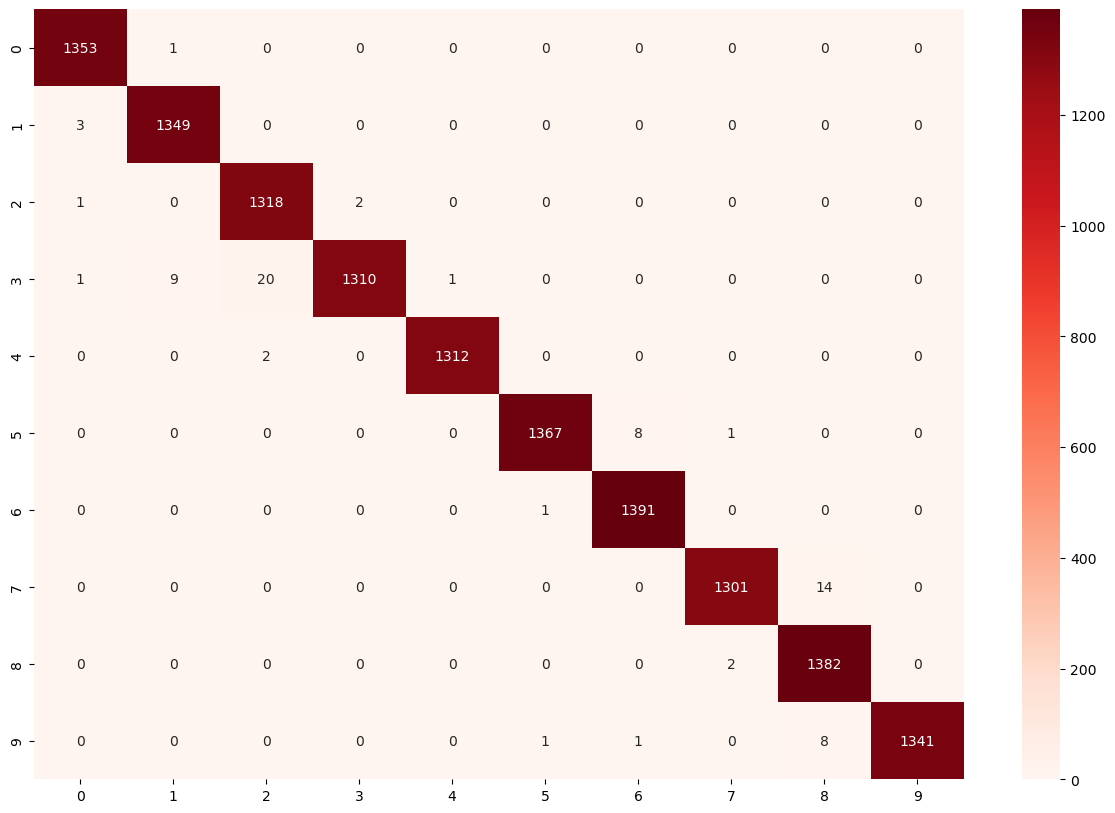

In [66]:
# Use the best model to make predictions on the testing set
y_pred_rfc1 = rfc1.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred=y_pred_rfc1))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred=y_pred_rfc1)
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds')

[learning_curve] Training set sizes: [ 2920  5840  8760 11680 14600 17520 20440 23360 26280 29200]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.3min finished


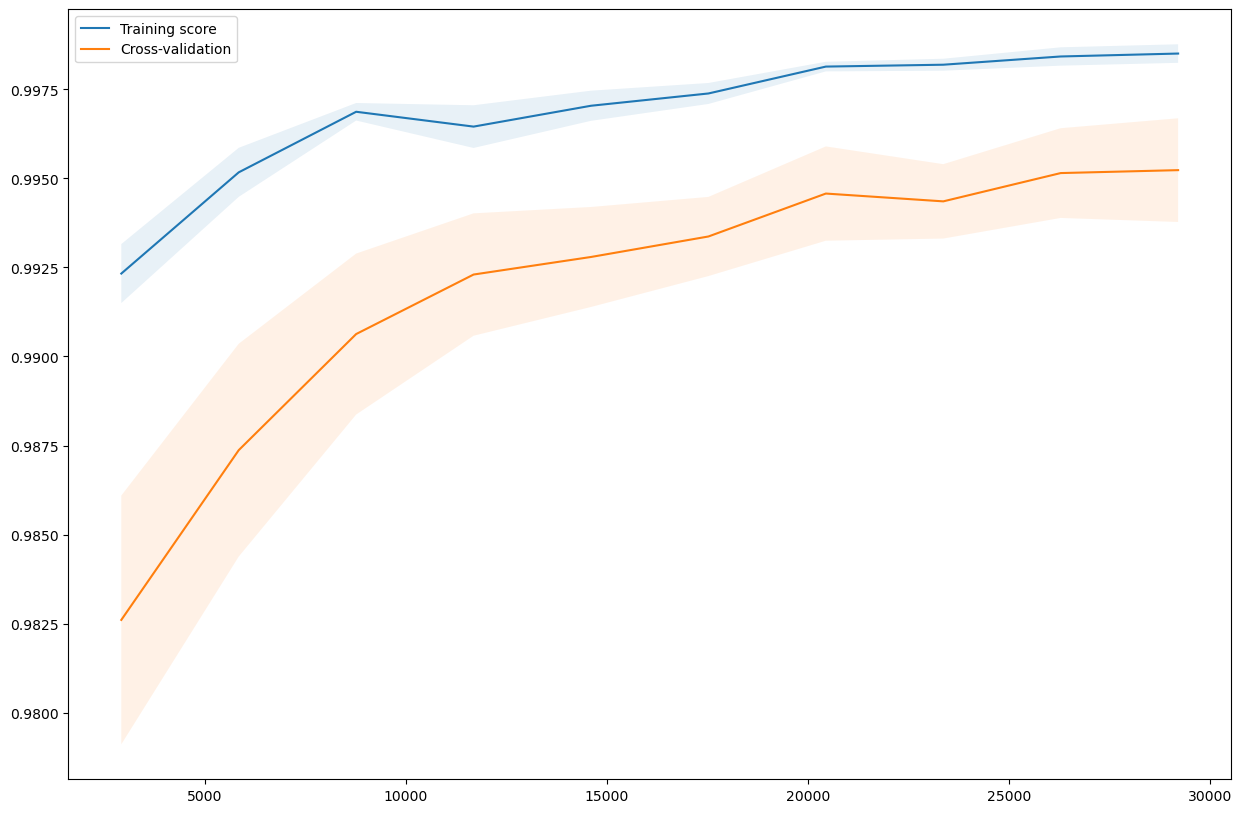

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rfc1, X_train_val, y_train_val, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), verbose=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15, 10))

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.legend()
plt.show()


## It appears that the shape of the two curves is quite appropriate to say that model is doing will, but our accuracy was 100% so there is a big chance that the model will overfit, so to avoid this we are going to use pruning to ameliorate our crf1 model.

# Pruning on the same Random forest Model

To ameliorate my model am going with :
* Fixing a threshold.
* Decreasing the max_deph.
* Eliminate the min_samples_leaf
* Dicreasing n_estimators



In [72]:
importances = rfc1.feature_importances_

threshold = 0.02
X_train_pruned = X_train.loc[:, importances >= threshold]
# Initialize pruned model with specified hyperparameters
rfc1_pruned = RandomForestClassifier(n_estimators=20,
                                     bootstrap=bootstrap,
                                     criterion=criterion,
                                     max_depth=5,
                                     min_samples_leaf=min_samples_leaf,
                                     #min_samples_split=min_samples_split,
                                     max_features=max_features)

# Perform 5-fold cross-validation and compute the mean score for pruned model
cv_scores_pruned = cross_val_score(rfc1_pruned, X_train_pruned, y_train.values.ravel(), cv=5)
mean_cv_score_pruned = cv_scores_pruned.mean()

# Print the mean cross-validation score for pruned model
print("Mean CV score for pruned model:", mean_cv_score_pruned)

# Fit pruned model to training data
rfc1_pruned.fit(X_train_pruned, y_train.values.ravel())


Mean CV score for pruned model: 0.9535372490148246


RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       n_estimators=20)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1354
           1       0.99      0.94      0.97      1352
           2       0.92      0.92      0.92      1321
           3       0.99      0.97      0.98      1341
           4       0.99      1.00      1.00      1314
           5       0.99      0.94      0.97      1376
           6       0.95      0.97      0.96      1392
           7       0.96      0.94      0.95      1315
           8       0.91      0.80      0.85      1384
           9       0.79      0.92      0.85      1351

    accuracy                           0.94     13500
   macro avg       0.94      0.94      0.94     13500
weighted avg       0.94      0.94      0.94     13500



<AxesSubplot:>

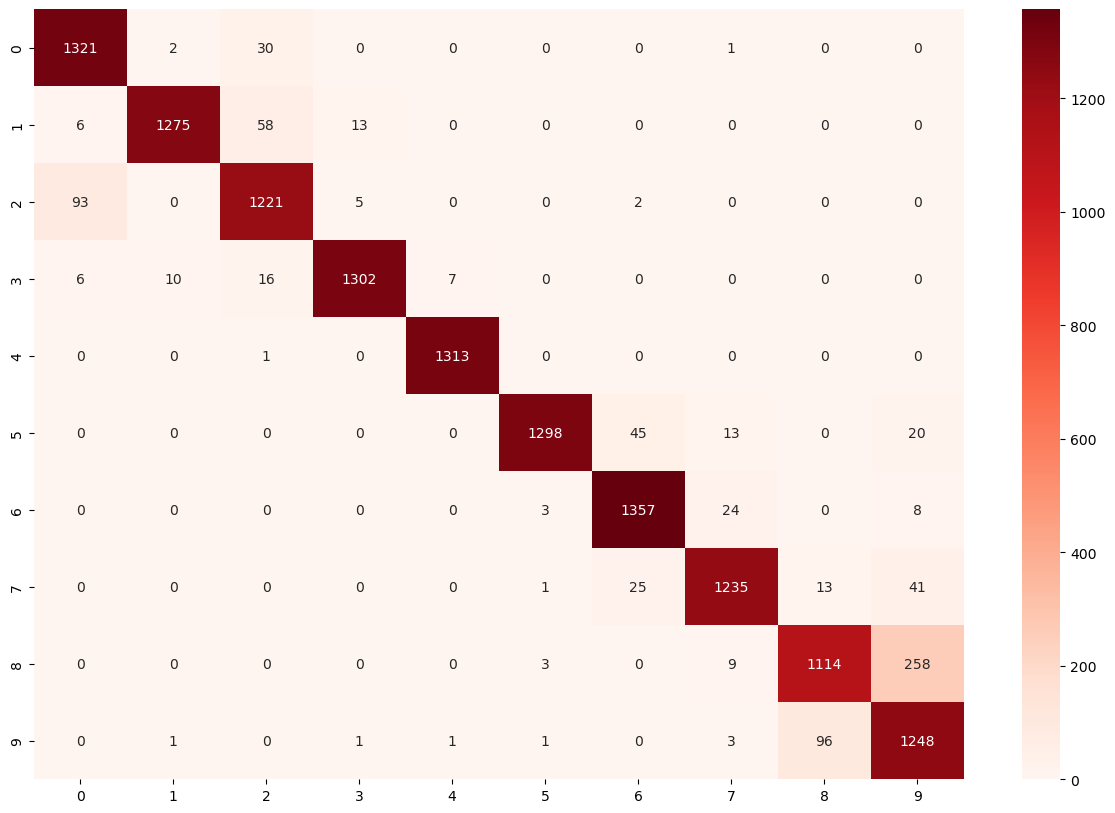

In [73]:
# Use the pruned model to make predictions on the testing set
X_test_pruned = X_test.loc[:, importances >= threshold]
y_pred_rfc1_pruned = rfc1_pruned.predict(X_test_pruned)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred=y_pred_rfc1_pruned))

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred=y_pred_rfc1_pruned)
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(cm, annot=True, fmt='g', cmap='Reds')


[learning_curve] Training set sizes: [ 2920  5840  8760 11680 14600 17520 20440 23360 26280 29200]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.7s finished


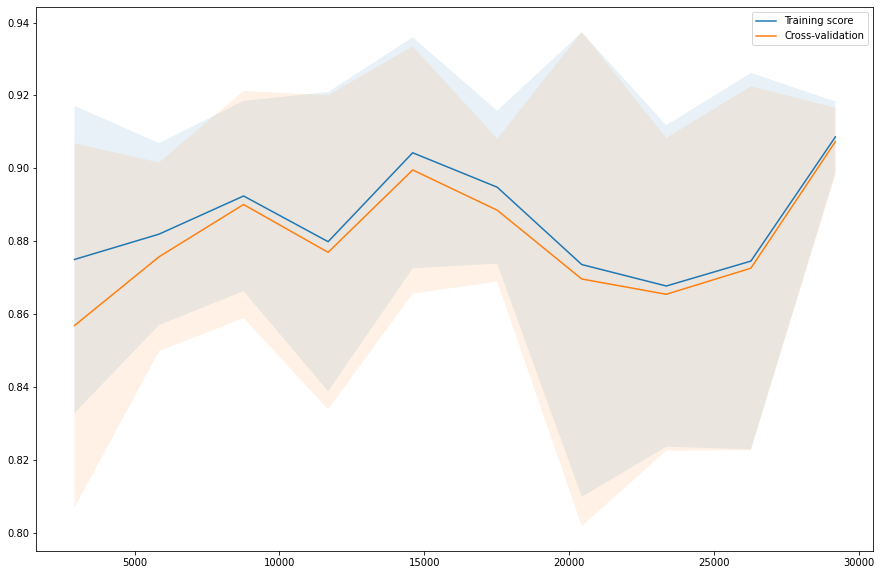

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rfc1_pruned, X_train_val, y_train_val, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), verbose=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15, 10))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.legend()
plt.show()

## If the training score and cross-validation score are superimposed or very close to each other, it generally indicates that the model is not overfitting and this is our case here. In other words, the model is not memorizing the training data but instead is generalizing well to new data.

In [97]:
import numpy as np

# Get the feature importances for all labels
importances = rfc1_pruned.feature_importances_

# Initialize an array to store the feature importances for each label
label_importances = np.zeros((len(rfc1_pruned.classes_), X_train_pruned.shape[1]))

# Loop over the decision tree estimators for each label and aggregate the feature importances
for i, tree in enumerate(rfc1_pruned.estimators_):
    label_idx = np.where(rfc1_pruned.classes_ == tree.classes_[0])[0][0]
    label_importances[label_idx] += tree.feature_importances_

# Print the feature importances for each label
for i, label in enumerate(rfc1_pruned.classes_):
    print(f"Feature importances for label {label}: {label_importances[i]}")


Feature importances for label 0: [2.33260395 0.45910954 0.50270951 0.20160919 0.50463338 0.85000899
 0.51315301 6.92957857 1.21416187 1.75082916 0.41355741 0.34681655
 1.56920187 2.1757663  0.2362607 ]
Feature importances for label 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Feature importances for label 2: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Feature importances for label 3: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Feature importances for label 4: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Feature importances for label 5: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Feature importances for label 6: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Feature importances for label 7: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Feature importances for label 8: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Feature importances for label 9: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### The model is only making predictions with one label and giving zero importance to all other features for all other labels, it could mean that your model is overfitting to the training data. In other words, the model has learned to only predict one label and ignore the other labels because that label is more prevalent in the training data, so we are going to drop this model.

# Random forest Model after using PCA


In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = random_state)

In [13]:
from sklearn.model_selection import cross_val_score

# Specify hyperparameters
criterion = 'entropy'
bootstrap = True
max_depth = 30
max_features = 'auto'
min_samples_leaf = 4
min_samples_split =10
n_estimators = 400

# Initialize model with specified hyperparameters
rfc = RandomForestClassifier(n_estimators=n_estimators,
                              bootstrap=bootstrap,
                              criterion=criterion,
                              max_depth=max_depth,
                              min_samples_leaf=min_samples_leaf,
                              min_samples_split=min_samples_split,
                              max_features=max_features)
# Perform 5-fold cross-validation and compute the mean score
cv_scores = cross_val_score(rfc, X_train_val, y_train_val, cv=5)
mean_cv_score = cv_scores.mean()

# Print the mean cross-validation score
print("Mean CV score:", mean_cv_score)

# Fit model to training data
rfc.fit(X_train, y_train.values.ravel())



Mean CV score: 0.8555616438356164


RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=400)

In [14]:
rfc.fit(X_train, y_train.values.ravel())



[CV] END algorithm=brute, leaf_size=30, n_neighbors=7, weights=distance; total time=   4.4s
[CV] END algorithm=brute, leaf_size=30, n_neighbors=7, weights=distance; total time=   3.1s
[CV] END algorithm=brute, leaf_size=30, n_neighbors=8, weights=uniform; total time=   3.5s
[CV] END algorithm=brute, leaf_size=30, n_neighbors=8, weights=uniform; total time=   3.4s
[CV] END algorithm=brute, leaf_size=30, n_neighbors=8, weights=uniform; total time=   3.4s
[CV] END algorithm=brute, leaf_size=30, n_neighbors=8, weights=distance; total time=   3.1s
[CV] END algorithm=brute, leaf_size=30, n_neighbors=8, weights=distance; total time=   3.1s
[CV] END algorithm=brute, leaf_size=35, n_neighbors=2, weights=uniform; total time=   3.1s
[CV] END algorithm=brute, leaf_size=35, n_neighbors=2, weights=uniform; total time=   2.8s
[CV] END algorithm=brute, leaf_size=35, n_neighbors=2, weights=distance; total time=   2.5s
[CV] END algorithm=brute, leaf_size=35, n_neighbors=2, weights=distance; total time=

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=400)

              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1354
           1       0.99      0.99      0.99      1352
           2       0.81      0.80      0.80      1321
           3       0.97      0.91      0.94      1341
           4       0.72      0.85      0.78      1314
           5       0.96      0.94      0.95      1376
           6       0.80      0.76      0.78      1392
           7       0.93      0.96      0.94      1315
           8       0.87      0.87      0.87      1384
           9       0.70      0.75      0.73      1351

    accuracy                           0.85     13500
   macro avg       0.86      0.85      0.85     13500
weighted avg       0.86      0.85      0.85     13500



<AxesSubplot:>

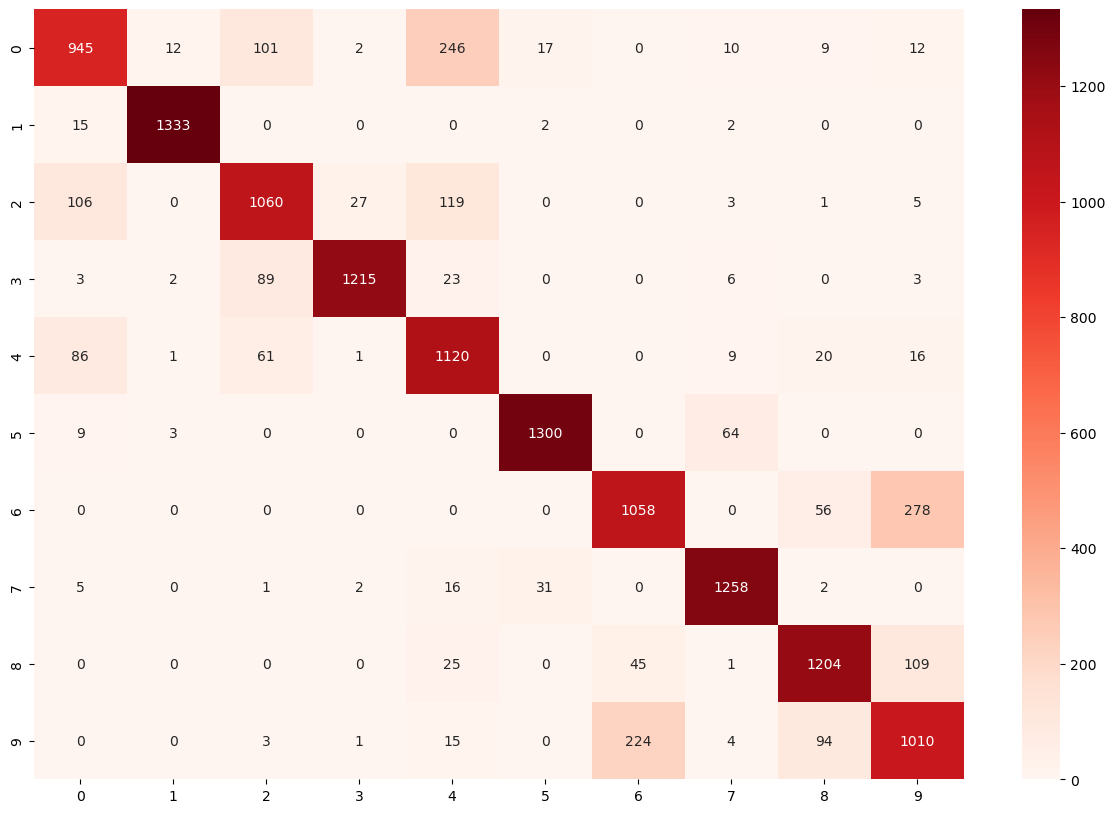

In [15]:
# Use the best model to make predictions on the testing set
y_pred_rfc = rfc.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred=y_pred_rfc))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred=y_pred_rfc)
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(cm, annot=True, fmt='g', cmap='Reds')

## Properly classified samples are shown on the diagonal, noted the squares colored in red. It could be seen that True Positives (i.e., correct predictions) prevail. Wrong guessings are located below and above the diagonal. 

[learning_curve] Training set sizes: [ 2920  5840  8760 11680 14600 17520 20440 23360 26280 29200]


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  8.6min finished


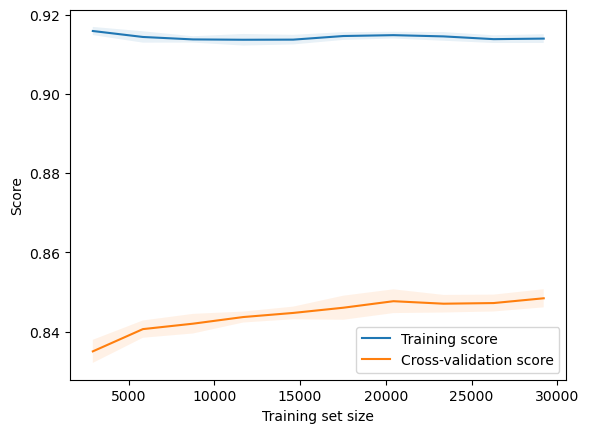

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rfc, X_train_val, y_train_val, cv=5, n_jobs= 2,
    train_sizes=np.linspace(0.1, 1.0, 10), verbose=1)

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.legend()
plt.show()

### A training score of 0.92 and a cross-validation score of 0.84 suggest that the model is doing reasonably well. It seems that the model is not overfitting too much.

### Display the feauture importance per lable 

In [16]:
import numpy as np

# Get the feature importances for all labels
importances = rfc.feature_importances_

# Initialize an array to store the feature importances for each label
label_importances = np.zeros((len(rfc.classes_), X_train.shape[1]))

# Loop over the decision tree estimators for each label and aggregate the feature importances
for i, tree in enumerate(rfc.estimators_):
    label_idx = np.where(rfc.classes_ == tree.classes_[0])[0][0]
    label_importances[label_idx] += tree.feature_importances_

# Print the feature importances for each label
for i, label in enumerate(rfc.classes_):
    print(f"Feature importances for label {label}: {label_importances[i]}")


Feature importances for label 0: [ 85.41955961 172.24863956 142.33180082]
Feature importances for label 1: [0. 0. 0.]
Feature importances for label 2: [0. 0. 0.]
Feature importances for label 3: [0. 0. 0.]
Feature importances for label 4: [0. 0. 0.]
Feature importances for label 5: [0. 0. 0.]
Feature importances for label 6: [0. 0. 0.]
Feature importances for label 7: [0. 0. 0.]
Feature importances for label 8: [0. 0. 0.]
Feature importances for label 9: [0. 0. 0.]


### The model is only making predictions with one label and giving zero importance to all other features for all other labels, it could mean that your model is overfitting to the training data. In other words, the model has learned to only predict one label and ignore the other labels because that label is more prevalent in the training data, so we are going to drop this model.

In [55]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=400)